In [1]:
import os
from skimage import io, measure, img_as_ubyte
import matplotlib.pyplot as plt
import numpy as np
from skimage.filters import threshold_multiotsu
from skimage.color import label2rgb
import pandas as pd

In [2]:
data_dir = 'Data/1-Crown'
img_list = os.listdir(data_dir)
img_list

['11.jpg',
 '15.jpg',
 '19.jpg',
 '2.jpg',
 '24.jpg',
 '33.jpg',
 '34.jpg',
 '48.jpg',
 '6.jpg',
 '706.jpg']

In [3]:
imgs = [io.imread(os.path.join(data_dir, f), as_gray=True) for f in img_list]
imgs

[array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 arr

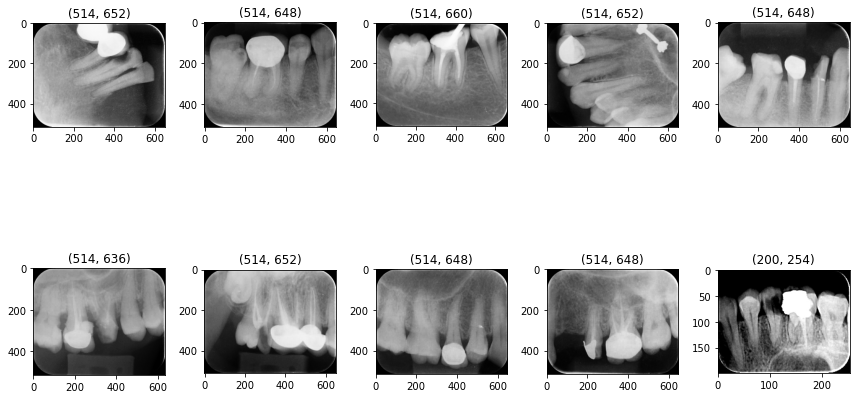

In [4]:
fig, axs = plt.subplots(2, 5, figsize=(12,12))
axs = axs.ravel()
for i in range(len(imgs)):
    axs[i].imshow(imgs[i], cmap='gray')
    axs[i].set_title(np.shape(imgs[i]))
    fig.tight_layout()

In [5]:
thresholds_list = [threshold_multiotsu(thresholds) for thresholds in imgs] 
thresholds_list

[array([0.36523438, 0.69726562]),
 array([0.25195312, 0.54101562]),
 array([0.24023438, 0.58398438]),
 array([0.27539062, 0.59960938]),
 array([0.36523438, 0.67382812]),
 array([0.32490043, 0.58635876]),
 array([0.31054688, 0.63476562]),
 array([0.24804688, 0.49804688]),
 array([0.24023438, 0.56054688]),
 array([0.20507812, 0.59570312])]

D:\Faizan\Anaconda3\envs\tensorflow\lib\site-packages\skimage\util\dtype.py:525: UserWarning: Downcasting int64 to uint8 without scaling because max value 2 fits in uint8
  return _convert(image, np.uint8, force_copy)


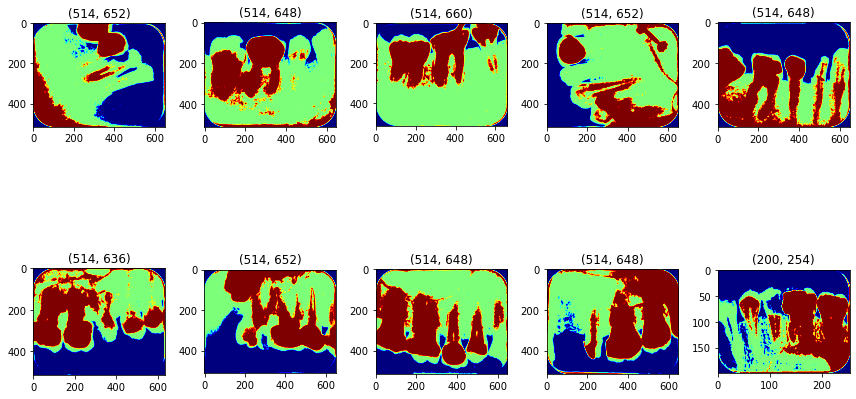

In [6]:
regions = [img_as_ubyte(np.digitize(imgs[i], bins=thresholds_list[i])) for i in range(len(imgs))]

fig, axs = plt.subplots(2, 5, figsize=(12,12))
axs = axs.ravel()
for i in range(len(imgs)):
    axs[i].imshow(regions[i], cmap='jet')
    axs[i].set_title(np.shape(regions[i]))
    fig.tight_layout()

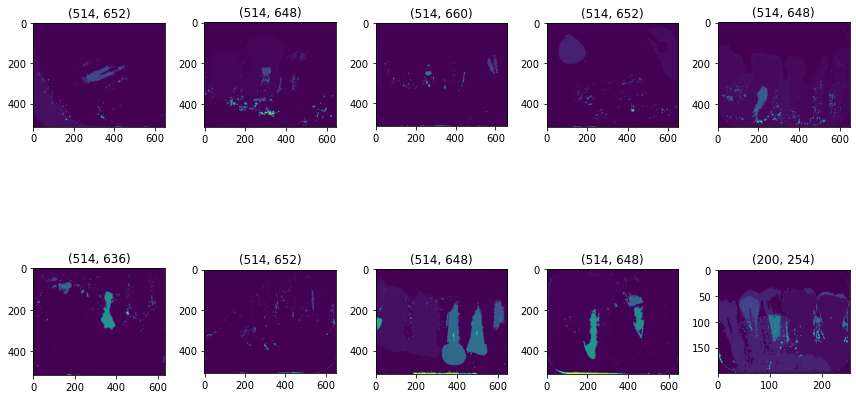

In [7]:
label_imgs = [measure.label(regions[i], connectivity=imgs[i].ndim) for i in range(len(regions))]

fig, axs = plt.subplots(2, 5, figsize=(12,12))
axs = axs.ravel()
for i in range(len(imgs)):
    axs[i].imshow(label_imgs[i])
    axs[i].set_title(np.shape(label_imgs[i]))
    fig.tight_layout()

<ipython-input-8-2574cbeda981>:1: FutureWarning: The new recommended value for bg_label is 0. Until version 0.19, the default bg_label value is -1. From version 0.19, the bg_label default value will be 0. To avoid this warning, please explicitly set bg_label value.
  image_label_overlay = [label2rgb(label_imgs[i], image=imgs[i]) for i in range(len(imgs))]


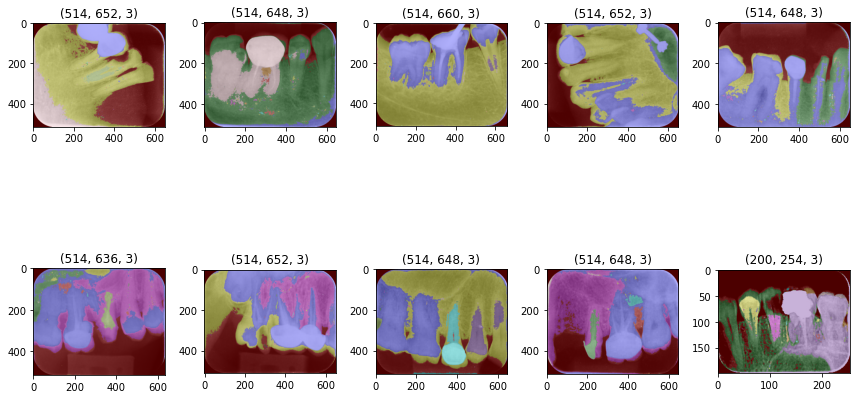

In [8]:
image_label_overlay = [label2rgb(label_imgs[i], image=imgs[i]) for i in range(len(imgs))]

fig, axs = plt.subplots(2, 5, figsize=(12,12))
axs = axs.ravel()
for i in range(len(imgs)):
    axs[i].imshow(image_label_overlay[i])
    axs[i].set_title(np.shape(image_label_overlay[i]))
    fig.tight_layout()

In [56]:
properties = ['label', 'area', 'bbox', 'bbox_area', 'centroid', 
              'slice', 'inertia_tensor', 'solidity', 'mean_intensity']

props_list = [measure.regionprops_table(label_imgs[i], imgs[i], properties=properties) for i in range(len(imgs))]
props_list

[{'label': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
          14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
          27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
          40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
          53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
          66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
          79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
          92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
         105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
         118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
         131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
         144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
         157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
         170, 171, 172, 173, 

In [57]:
df = pd.DataFrame(props_list)
df

,label,area,bbox-0,bbox-1,bbox-2,bbox-3,bbox_area,centroid-0,centroid-1,slice,inertia_tensor-0-0,inertia_tensor-0-1,inertia_tensor-1-0,inertia_tensor-1-1,solidity,mean_intensity
0,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[27522, 155795, 2, 1, 43, 1, 1, 7, 1, 1, 1, 2,...","[0, 1, 5, 6, 7, 12, 14, 16, 22, 24, 25, 32, 41...","[79, 8, 146, 84, 59, 65, 55, 49, 43, 41, 39, 3...","[452, 514, 7, 7, 15, 13, 15, 19, 23, 25, 26, 3...","[652, 649, 147, 85, 71, 66, 56, 54, 44, 42, 40...","[258996, 328833, 2, 1, 96, 1, 1, 15, 1, 1, 1, ...","[82.76251725892014, 244.68591418209826, 5.5, 6...","[364.82443136399974, 253.35067235790623, 146.0...","[(slice(0, 452, None), slice(79, 652, None)), ...","[10088.24437367745, 21672.282272968132, 0.0, 0...","[-3930.998745854046, -3730.2885744118307, -0.0...","[-3930.998745854046, -3730.2885744118307, -0.0...","[4080.0144543566703, 14934.926139084522, 0.25,...","[0.21104209799861973, 0.528785451484584, 1.0, ...","[0.9356994974430439, 0.55563360348472, 0.73725..."
1,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[16278, 14, 6, 172806, 2, 1, 1, 77383, 1, 1, 5...","[0, 1, 1, 1, 32, 34, 37, 68, 76, 79, 93, 93, 9...","[30, 94, 109, 0, 583, 581, 575, 16, 438, 434, ...","[514, 2, 2, 506, 34, 35, 38, 411, 77, 80, 97, ...","[648, 108, 115, 645, 584, 582, 576, 397, 439, ...","[317652, 14, 6, 325725, 2, 1, 1, 130683, 1, 1,...","[406.8961174591473, 1.0, 1.0, 305.350282976285...","[469.9356186263669, 100.5, 111.5, 368.14116407...","[(slice(0, 514, None), slice(30, 648, None)), ...","[30650.66411895322, 16.25, 2.9166666666666665,...","[7132.280431803838, -0.0, -0.0, 4821.326607889...","[7132.280431803838, -0.0, -0.0, 4821.326607889...","[25410.806200677198, 0.0, 0.0, 17279.078411751...","[0.05549911013221867, 1.0, 1.0, 0.566958119391...","[0.6852354555288143, 0.2879551820728291, 0.303..."
2,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[92070, 206069, 2, 1, 1, 1, 2, 3, 1, 1, 2, 1, ...","[0, 2, 3, 4, 11, 13, 14, 16, 17, 17, 30, 34, 4...","[65, 0, 83, 79, 61, 57, 54, 50, 509, 512, 434,...","[514, 514, 4, 5, 12, 14, 16, 18, 18, 18, 32, 3...","[660, 656, 85, 80, 62, 58, 56, 53, 510, 513, 4...","[305830, 335872, 2, 1, 1, 1, 4, 6, 1, 1, 2, 1,...","[162.31456500488758, 326.09408984369315, 3.0, ...","[313.5985337243402, 346.7737699508417, 83.5, 7...","[(slice(0, 514, None), slice(65, 660, None)), ...","[22711.06711851909, 39224.566394660724, 0.25, ...","[4084.086626846142, 2281.1437704146488, -0.0, ...","[4084.086626846142, 2281.1437704146488, -0.0, ...","[7959.588808171266, 15340.136520738302, 0.0, 0...","[0.3752843062926459, 0.637775219277884, 1.0, 1...","[0.7426787376186491, 0.4324201326435587, 0.637..."
3,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[76192, 160537, 1, 1, 1, 2, 2, 8, 1, 10, 1, 1,...","[0, 5, 6, 9, 9, 10, 11, 11, 12, 12, 14, 17, 17...","[79, 46, 443, 396, 408, 238, 195, 499, 99, 184...","[514, 514, 7, 10, 10, 12, 12, 17, 13, 16, 15, ...","[652, 647, 444, 397, 409, 239, 197, 502, 100, ...","[294522, 305909, 1, 1, 1, 2, 2, 18, 1, 16, 1, ...","[325.97743857622845, 224.48053719703245, 6.0, ...","[418.92659334313316, 344.0454786124071, 443.0,...","[(slice(0, 514, None), slice(79, 652, None)), ...","[17003.360936011235, 21819.48140902503, 0.0, 0...","[1450.754438603045, -4521.155444526337, -0.0, ...","[1450.754438603045, -4521.155444526337, -0.0, ...","[26734.834184913274, 14677.465814351037, 0.0, ...","[0.2950250913821944, 0.6494504205284216, 1.0, ...","[0.7043482512702689, 0.47934936995160965, 0.59..."
4,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[329, 3, 1, 31, 1, 1, 1, 10, 1, 55, 2143, 2, 3...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 3, 5, ...","[108, 437, 440, 441, 472, 473, 474, 475, 485, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 9, 3, 4, 511, 8...","[437, 440, 441, 472, 473, 474, 475, 485, 486, ...","[329, 3, 1, 31, 1, 1, 1, 10, 1, 55, 2840, 4, 4...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[272.0, 438.0, 440.0, 456.0, 472.0, 473.0, 474...","[(slice(0, 1, N

In [58]:
csv_dir = 'Data\csv\crown'
df.to_excel(os.path.join(csv_dir, 'df.xlsx'))

In [59]:
for i in range(len(imgs)): 
    img_props = measure.regionprops_table(label_imgs[i], imgs[i], properties=properties) 
    temp_img = pd.DataFrame(img_props)
    temp_img = temp_img[temp_img['area']>50]
    temp_img.to_csv(os.path.join(csv_dir, f'temp_img{i}.csv'))

In [60]:
df = pd.read_csv(os.path.join(csv_dir, 'temp_img0.csv'))
df

,Unnamed: 0,label,area,bbox-0,bbox-1,bbox-2,bbox-3,bbox_area,centroid-0,centroid-1,slice,inertia_tensor-0-0,inertia_tensor-0-1,inertia_tensor-1-0,inertia_tensor-1-1,solidity,mean_intensity
0,0,1,27522,0,79,452,652,258996,82.762517,364.824431,"(slice(0, 452, None), slice(79, 652, None))",10088.244374,-3930.998746,-3930.998746,4080.014454,0.211042,0.935699
1,1,2,155795,1,8,514,649,328833,244.685914,253.350672,"(slice(1, 514, None), slice(8, 649, None))",21672.282273,-3730.288574,-3730.288574,14934.926139,0.528785,0.555634
2,17,18,32285,68,0,514,372,165912,395.241350,78.165650,"(slice(68, 514, None), slice(0, 372, None))",4514.211742,-4262.806977,-4262.806977,9070.520285,0.391694,0.782365
3,73,74,72,195,260,212,271,187,202.583333,265.666667,"(slice(195, 212, None), slice(260, 271, None))",9.166667,-4.694444,-4.694444,15.937500,0.549618,0.707734
4,85,86,56,202,246,211,259,117,205.607143,252.803571,"(slice(202, 211, None), slice(246, 259, None))",9.479273,-0.262117,-0.262117,3.917092,0.674699,0.702801
5,98,99,5262,209,249,300,404,14105,256.716078,323.766249,"(slice(209, 300, None), slice(249, 404, None))",1318.751138,402.605706,402.605706,323.364846,0.686408,0.721354
6,105,106,84,210,440,223,454,182,216.107143,445.678571,"(slice(210, 223, None), slice(440, 454, None))",11.241922,-0.093963,-0.093963,7.048044,0.682927,0.706256
7,118,119,196,214,420,234,439,380,223.045918,429.061224,"(slice(214, 234, None), slice(420, 439, None))",23.700333,4.849750,4.849750,18.513198,0.678201,0.712705
8,408,409,69,460,335,471,351,176,465.014493,342.000000,"(slice(460, 471, None), slice(335, 351, None))",20.463768,-8.130435,-8.130435,6.275152,0.690000,0.388178
